<a href="https://colab.research.google.com/github/wmchen312/TibameDL/blob/main/1021transfer_%E9%81%B7%E7%A7%BB%E5%AD%B8%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile #用python解壓縮 (7z)解在colab
f= zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/DL1021additional/train.zip")
f.extractall()

In [ ]:
import glob
import pandas as pd

dogs=glob.glob("train/dog.*")
cats=glob.glob("train/cat.*")
df=pd.DataFrame({
    "path":dogs+cats,
    "ans":[0]*len(dogs)+[1]*len(cats)
    })
df

,path,ans
0,train/dog.5450.jpg,0
1,train/dog.1933.jpg,0
2,train/dog.8744.jpg,0
3,train/dog.2438.jpg,0
4,train/dog.5943.jpg,0
...,...,...
24995,train/cat.8920.jpg,1
24996,train/cat.1859.jpg,1
24997,train/cat.8150.jpg,1
24998,train/cat.8976.jpg,1


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense
cnn = VGG16(include_top=False, input_shape=(224,224,3))#預設模型是224
#cnn.summary()
for l in cnn.layers:
    l.trainable = False
layers = [
    GlobalAveragePooling2D(),
    Dense(2,activation="softmax")
]
model = Sequential(cnn.layers + layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
# y: 做one-hot encoding很耗費ram, 直接使用Sparse省RAM又方便
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

[[[ -20.939003   -33.779      -25.68     ]
  [ -22.939003   -32.779      -24.68     ]
  [  -1.939003    -6.7789993    1.3199997]
  ...
  [ 136.061      127.221      125.32     ]
  [ 128.061      119.221      122.32     ]
  [ 118.061      108.221      114.32     ]]

 [[  21.060997    15.221001    21.32     ]
  [  26.060997    24.221       29.32     ]
  [  23.060997    25.221       32.32     ]
  ...
  [ 122.061      113.221      115.32     ]
  [ 131.061      125.221      125.32     ]
  [ 137.061      132.22101    131.32     ]]

 [[  24.060997    30.221       31.32     ]
  [  64.061       72.221       75.32     ]
  [  74.061       87.221       90.32     ]
  ...
  [ 115.061      107.221      113.32     ]
  [ 120.061      119.221      114.32     ]
  [ 129.061      129.22101    122.32     ]]

 ...

 [[ -41.939003   -54.779      -50.68     ]
  [ -51.939003   -55.779      -68.68     ]
  [ -27.939003   -19.779      -48.68     ]
  ...
  [ -61.939003   -44.779      -71.68     ]
  [ -66.939      -

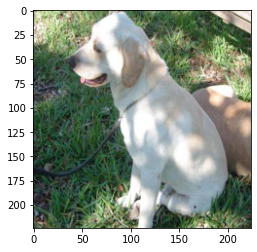

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

p = df["path"]
idx = random.randint(0, len(p)-1)
img = Image.open(p[idx]).resize((224, 224)).convert("RGB")
img_np = np.array(img)
img_np_pre = preprocess_input(img_np)
print(img_np_pre)
plt.imshow(img)

In [ ]:
#img_np[:80,:50,:].shape #list拿到80,50, 全部 省略可打...

In [ ]:
'''#############
def test():
    for i in range(3):
     yield i
for t in test():
    print(t)'''

'#############\ndef test():\n    for i in range(3):\n     yield i\nfor t in test():\n    print(t)'

In [ ]:
x = np.array(df["path"])
y = np.array(df["ans"])

In [ ]:
def data_generator(x, y, batch_size=20):
    while True:
        idx = np.random.randint(0, len(x), size=batch_size)
        x_batch, y_batch = x[idx], y[idx]
        x_final = []
        for path in x_batch:
            img = Image.open(path).resize((224, 224)).convert("RGB")
            img_pre = preprocess_input(np.array(img))
            x_final.append(img_pre)
        x_final = np.array(x_final)
        y_batch = np.array(y_batch)
        yield (x_final, y_batch)
gen = data_generator(x, y)
x_gen, y_gen = gen.__next__()
print(x_gen.shape)
print(y_gen.shape)
# print(x_gen)
# print(y_gen)

(20, 224, 224, 3)
(20,)


In [ ]:
from sklearn.model_selection import train_test_split
dogx = x[y == 0]
catx = x[y == 1]
dog1000 = np.random.choice(dogx, 1000, replace=False)
dog900, dog100 = train_test_split(dog1000, test_size=0.1)
cat1000 = np.random.choice(catx, 1000, replace=False)
cat900, cat100 = train_test_split(cat1000, test_size=0.1)
x_train = np.concatenate((dog900, cat900))
y_train = np.array([0] * len(dog900) + [1] * len(cat900))
x_test = np.concatenate((dog100, cat100))
y_test = np.array([0] * len(dog100) + [1] * len(cat100))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1800,)
(200,)
(1800,)
(200,)


In [ ]:
train_generator = data_generator(x_train, y_train)
test_generator = data_generator(x_test, y_test)

In [ ]:
# 50 * 20 -> 訓練
# 5 * 20 -> 測試
model.fit_generator(train_generator,
          steps_per_epoch=50,
          epochs=2,
          validation_data=test_generator,
          validation_steps=5)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
50/50 [==============================] - 49s 265ms/step - loss: 2.8614 - accuracy: 0.6410 - val_loss: 0.5805 - val_accuracy: 0.8600
Epoch 2/2
50/50 [==============================] - 12s 235ms/step - loss: 0.4128 - accuracy: 0.9040 - val_loss: 0.4769 - val_accuracy: 0.9000


In [ ]:
testx,testy=test_generator.__next__()
model.predict(testx)

array([[9.9987769e-01, 1.2224079e-04],
       [2.2176350e-04, 9.9977821e-01],
       [1.5448102e-04, 9.9984550e-01],
       [5.9601945e-01, 4.0398058e-01],
       [6.6541349e-07, 9.9999928e-01],
       [1.0000000e+00, 1.0180696e-11],
       [5.1568079e-01, 4.8431924e-01],
       [1.0000000e+00, 7.4945423e-12],
       [2.2210008e-01, 7.7789992e-01],
       [3.7260837e-04, 9.9962735e-01],
       [1.0000000e+00, 1.8452172e-14],
       [5.2812337e-03, 9.9471879e-01],
       [3.0744213e-01, 6.9255787e-01],
       [1.5477852e-03, 9.9845219e-01],
       [9.9999964e-01, 3.3947458e-07],
       [1.0000000e+00, 7.4945423e-12],
       [1.7922684e-03, 9.9820769e-01],
       [1.0000000e+00, 8.4426492e-09],
       [1.0000000e+00, 1.4473399e-09],
       [9.9828798e-01, 1.7120269e-03]], dtype=float32)

In [ ]:
ori_imgs = []
for p in x_test:
    img = Image.open(p).resize((224, 224)).convert("RGB")
    ori_imgs.append(np.array(img))
ori_imgs = np.array(ori_imgs)
preprocess_imgs = preprocess_input(ori_imgs)
pre = model.predict(preprocess_imgs).argmax(axis=1)

In [ ]:
trans = ["Dog", "Cat"]
idx = np.nonzero(pre != y_test)[0]
pre_false_img = ori_imgs[idx]
pre_false_val = pre[idx]
pre_false_ori = y_test[idx]

plt.figure(figsize=(15, 15))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_ori[i]],
                                trans[pre_false_val[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])

In [ ]:
import requests
url = input("Enter:")
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((224, 224)).convert("RGB")
img_np = preprocess_input(np.array(img).reshape(1, 224, 224, 3))
proba = model.predict(img_np)
ans = proba.argmax(axis=1)
print("預測:", trans[ans[0]])
print("機率:", proba[0])
plt.imshow(img)